In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


#from sklearn.model_selection import train_test_split
#from tensorflow.python.client import device_lib

In [6]:
print("CUDA available: ",tf.test.is_built_with_cuda() )
print("GPU available: ",tf.config.list_physical_devices() )

CUDA available:  False
GPU available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [7]:
train = pd.read_csv('./datasets/mnist_train.csv',header=None)
test = pd.read_csv('./datasets/mnist_test.csv',header=None)

train.rename({0:"label"},axis=1,inplace=True)
test.rename({0:"label"},axis=1,inplace=True)

normalized_train = ((train-train.min())/(train.max()-train.min())).fillna(0)
normalized_test = ((test-test.min())/(test.max()-test.min())).fillna(0)

x_train = normalized_train.iloc[:,1:].copy()
x_test = normalized_test.iloc[:,1:].copy()

y_train = train.loc[:,"label"]
y_test = test.loc[:,"label"]

train.head()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
competition = pd.read_csv("./datasets/mnist_competition.csv",header=None)
norm_comp = ((competition-competition.min())/(competition.max()-competition.min())).fillna(0)
norm_comp.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [6]:
print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))

Training set has 5169 rows and 785 columns
Test set has 5776 rows and 785 columns


### Data visualisation

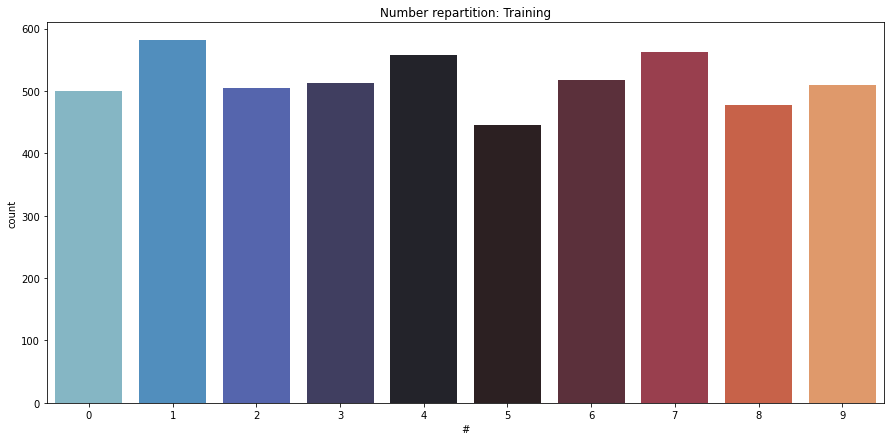

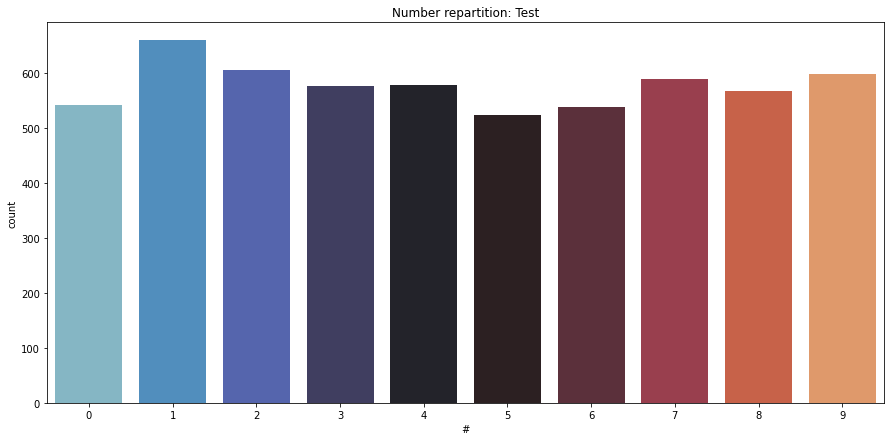

In [7]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_train,palette="icefire")
plt.xlabel('#')
plt.title('Number repartition: Training')
plt.show()

plt.figure(figsize=(15,7))
sns.countplot(x=y_test,palette="icefire")
plt.xlabel('#')
plt.title('Number repartition: Test')
plt.show()

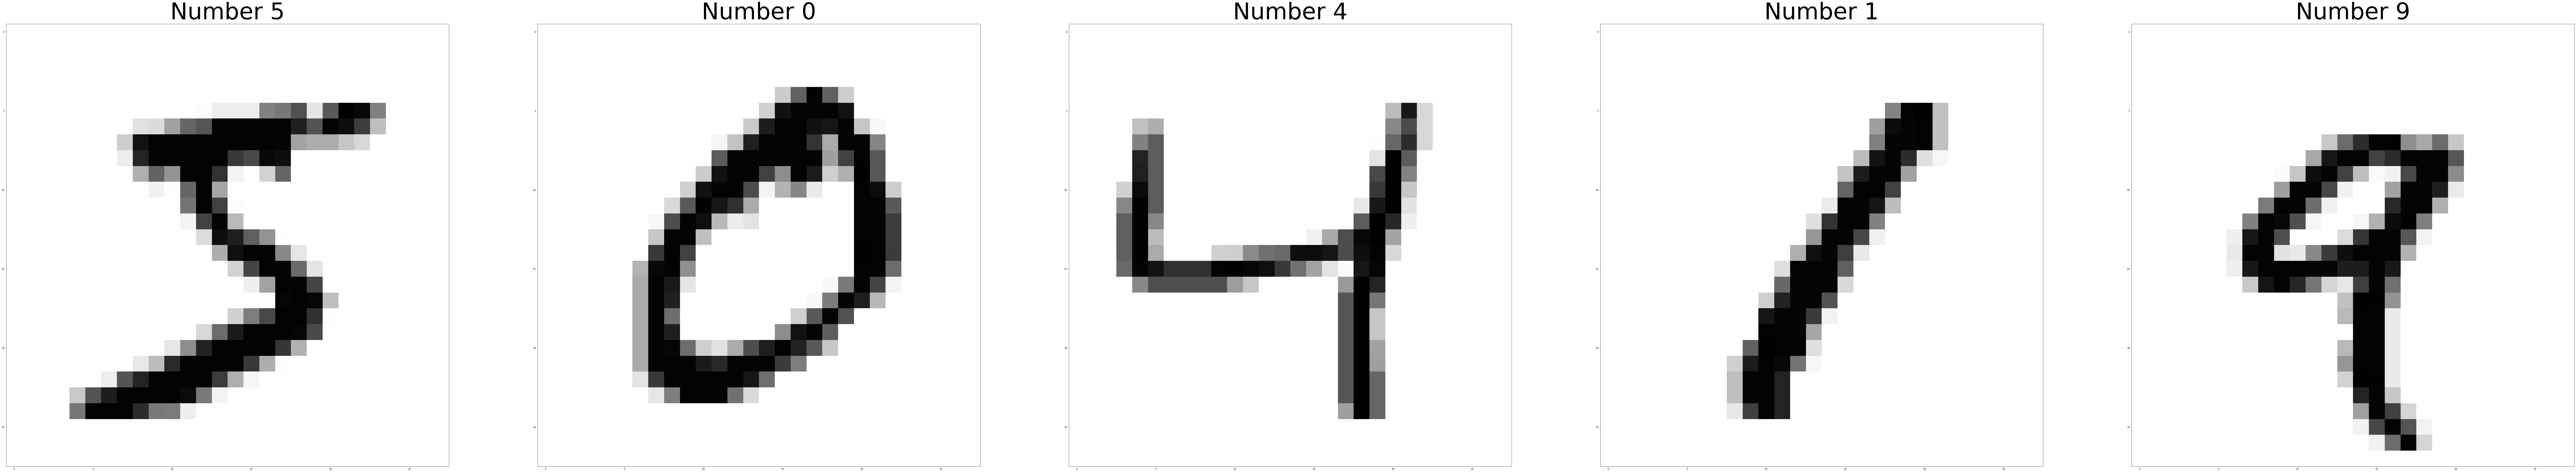

In [8]:
plt.figure(figsize=(200,800))
for i in range(5):
    image = np.array(1-x_train.iloc[i,:]).reshape(28,28)
    plt.subplot(1,5,i+1)
    plt.gca().set_title("Number {}".format(y_train[i]),fontsize=100)
    
    plt.imshow(image,cmap="gray",interpolation="none")
    

    
plt.show()

### Data preprocessing

In [16]:
x_train_reshaped=x_train.values.reshape(-1,28,28,1)
x_test_reshaped=x_test.values.reshape(-1,28,28,1)

print("X Train Shape: ",x_train_reshaped.shape)
print("X Test Shape: ",x_test_reshaped.shape)

y_train_reshaped = to_categorical(y_train,num_classes=10)
y_test_reshaped = to_categorical(y_test,num_classes=10)

print("Y Train Shape: ",y_train_reshaped.shape)
print("Y Test Shape: ",y_test_reshaped.shape)

X Train Shape:  (60000, 28, 28, 1)
X Test Shape:  (10000, 28, 28, 1)
Y Train Shape:  (60000, 10)
Y Test Shape:  (10000, 10)


In [10]:
comp_reshaped = norm_comp.values.reshape(-1,28,28,1)
comp_reshaped.shape

(10000, 28, 28, 1)

### CNN implementation

In [11]:
num_classes = 10
input_shape = (28, 28, 1)

models = dict()

# Simple basis, 1 Layer CNN
model = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ]
)

models["1L-Simple"] = model

# Simple basis, 2 Layers CNN
model2 = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ]
)

models["2L-Simple"] = model2

# Same as above but add a drop out Layer
model3 = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

models["2L-dropout"] = model3


# Classic 2L with bigger kernel
model4 = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(5, 5),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(5, 5),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ]
)

models["2L-kernel"] = model4

# Classic 3L CNN
model4 = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ]
)

models["3L-Simple"] = model4


for type,model in models.items():
    print("Summary for {}".format(type))
    model.summary() 

Summary for 1L-Simple
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Summary for 2L-Simple
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)     

2022-05-23 16:24:10.377487: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-23 16:24:10.378297: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
learning_rate = 0.01

for type,model in models.items():
    print("Compiling the model {}".format(type))
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate),metrics=['accuracy'])

Compiling the model 1L-Simple
Compiling the model 2L-Simple
Compiling the model 2L-dropout
Compiling the model 2L-kernel
Compiling the model 3L-Simple


In [13]:
batch_size = 1024
epochs = 20


histories = dict()

for type,model in models.items():
    print("starting training the model {}".format(type))
    history = model.fit(x_train_reshaped,y_train_reshaped,batch_size=batch_size,epochs=epochs,validation_split=0.1)
    histories[type] = history

starting training the model 1L-Simple
Epoch 1/20
5/5 [==============================] - 2s 321ms/step - loss: 1.5051 - accuracy: 0.5613 - val_loss: 0.7186 - val_accuracy: 0.7621
Epoch 2/20
5/5 [==============================] - 1s 275ms/step - loss: 0.5350 - accuracy: 0.8325 - val_loss: 0.5542 - val_accuracy: 0.8433
Epoch 3/20
5/5 [==============================] - 1s 274ms/step - loss: 0.3968 - accuracy: 0.8876 - val_loss: 0.3905 - val_accuracy: 0.8994
Epoch 4/20
5/5 [==============================] - 1s 274ms/step - loss: 0.3108 - accuracy: 0.9138 - val_loss: 0.3477 - val_accuracy: 0.9091
Epoch 5/20
5/5 [==============================] - 1s 277ms/step - loss: 0.2456 - accuracy: 0.9308 - val_loss: 0.2917 - val_accuracy: 0.9284
Epoch 6/20
5/5 [==============================] - 1s 276ms/step - loss: 0.1943 - accuracy: 0.9454 - val_loss: 0.2422 - val_accuracy: 0.9342
Epoch 7/20
5/5 [==============================] - 1s 276ms/step - loss: 0.1592 - accuracy: 0.9564 - val_loss: 0.2326 - val

'histories = [model.fit(\n    x_train_reshaped, y_train_reshaped,\n    batch_size=batch_size,\n    epochs=epochs,\n    validation_split=0.1) for model in models.values()]'

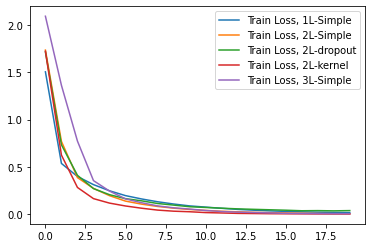

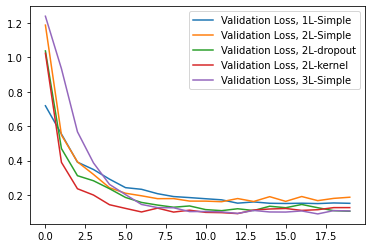

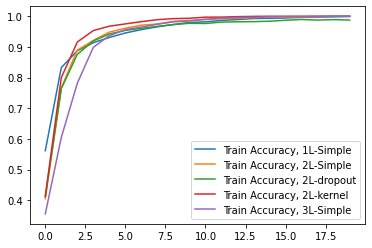

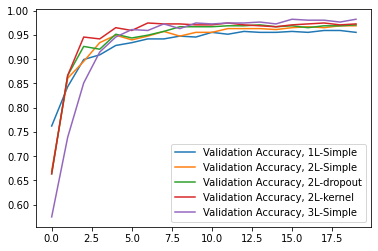

In [15]:
_= [plt.plot(histories[name].history["loss"], label=f"Train Loss, {name}") for name, model in models.items()]
plt.legend()
plt.figure()
_= [plt.plot(histories[name].history["val_loss"], label=f"Validation Loss, {name}") for name, model in models.items()]
plt.legend()


plt.figure()
_= [plt.plot(histories[name].history["accuracy"], label=f"Train Accuracy, {name}") for name, model in models.items()]
plt.legend()
plt.figure()
_= [plt.plot(histories[name].history["val_accuracy"], label=f"Validation Accuracy, {name}") for name, model in models.items()]
plt.legend()

In [16]:
scores = [model.evaluate(x_test_reshaped, y_test_reshaped, verbose=0) for name,model in models.items()]
_ = [print("Test loss:", scores[i][0],"Test accuracy:", scores[i][1], "Model: ", name) for i,name in enumerate(models.keys())]

Test loss: 0.17923469841480255 Test accuracy: 0.9487534761428833 Model:  1L-Simple
Test loss: 0.12177816778421402 Test accuracy: 0.9674515128135681 Model:  2L-Simple
Test loss: 0.09316089004278183 Test accuracy: 0.9703947305679321 Model:  2L-dropout
Test loss: 0.10664165765047073 Test accuracy: 0.9754155278205872 Model:  2L-kernel
Test loss: 0.10912598669528961 Test accuracy: 0.9719529151916504 Model:  3L-Simple


We can see that the more complexe the architecture, the better (obviously up to a point, which we probably haven't reach yet). The 3 Layer NN would probably benefits of more training epoch, we'll look at him when checking the impact of the number of training iterations on the **test** set

In [13]:
model_3L = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ]
)

model_3L.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [14]:
learning_rate = 0.001
model_3L.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate),metrics=['accuracy'])

In [17]:
batch_size = 512
epochs = 50



history = model_3L.fit(x_train_reshaped,y_train_reshaped,batch_size=batch_size,epochs=epochs,validation_data=(x_test_reshaped,y_test_reshaped))


2022-05-23 16:25:09.773103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-23 16:25:09.773339: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3792010000 Hz


Epoch 1/50
118/118 [==============================] - 28s 238ms/step - loss: 1.0394 - accuracy: 0.7013 - val_loss: 0.1098 - val_accuracy: 0.9636
Epoch 2/50
118/118 [==============================] - 29s 250ms/step - loss: 0.1021 - accuracy: 0.9684 - val_loss: 0.0620 - val_accuracy: 0.9812
Epoch 3/50
118/118 [==============================] - 31s 261ms/step - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.0505 - val_accuracy: 0.9845
Epoch 4/50
118/118 [==============================] - 25s 210ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0397 - val_accuracy: 0.9871
Epoch 5/50
118/118 [==============================] - 22s 183ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 6/50
118/118 [==============================] - 20s 173ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0369 - val_accuracy: 0.9877
Epoch 7/50
118/118 [==============================] - 21s 178ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0345 - val_ac

In [19]:
prediction = model_3L.predict(comp_reshaped)
result = prediction.argmax(axis=1)
result

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
with open('../00_competition/cnn.txt', 'w') as f:
    for pred in result:
        f.write(str(pred))
        f.write('\n')

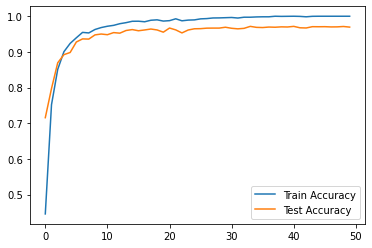

In [30]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Test Accuracy")
plt.legend()

### Sources
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://www.kaggle.com/code/premshah/mnist-dataset-using-keras/notebook
- https://www.kaggle.com/code/software007/cnn-with-mnist-csv-dataset/notebook
- Assignement 10 ML course Bachelor Unifr

#### Hint from course

We're more familiar with Keras than Torch, but but the result is the same

In [ ]:
"""
CNN with 3 conv layers and a fully connected classification layer
PATTERN RECOGNITION EXERCISE:
Fix the three lines below marked with PR_FILL_HERE
"""

import torch.nn as nn


class Flatten(nn.Module):
    """
    Flatten a convolution block into a simple vector.

    Replaces the flattening line (view) often found into forward() methods of networks. This makes it
    easier to navigate the network with introspection
    """
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x


class PR_CNN(nn.Module):
    """
    Simple feed forward convolutional neural network

    Attributes
    ----------
    expected_input_size : tuple(int,int)
        Expected input size (width, height)
    conv1 : torch.nn.Sequential
    conv2 : torch.nn.Sequential
    conv3 : torch.nn.Sequential
        Convolutional layers of the network
    fc : torch.nn.Linear
        Final classification fully connected layer

    """

    def __init__(self, **kwargs):
        """
        Creates an CNN_basic model from the scratch.

        Parameters
        ----------
        output_channels : int
            Number of neurons in the last layer
        input_channels : int
            Dimensionality of the input, typically 3 for RGB
        """
        super(PR_CNN, self).__init__()

        # PR_FILL_HERE: Here you have to put the expected input size in terms of width and height of your input image
        self.expected_input_size = (______, ______)

        # First layer
        self.conv1 = nn.Sequential(
            # PR_FILL_HERE: Here you have to put the input channels, output channels ands the kernel size
            nn.Conv2d(in_channels=______, out_channels=______, kernel_size=______, stride=3),
            nn.LeakyReLU()
        )

        # Classification layer
        self.fc = nn.Sequential(
            Flatten(),
            # PR_FILL_HERE: Here you have to put the output size of the linear layer. DO NOT change 1536!
            nn.Linear(1536, ______)
        )

    def forward(self, x):
        """
        Computes forward pass on the network

        Parameters
        ----------
        x : Variable
            Sample to run forward pass on. (input to the model)

        Returns
        -------
        Variable
            Activations of the fully connected layer
        """
        x = self.conv1(x)
        x = self.fc(x)
        return x
